<a href="https://colab.research.google.com/github/Sandipkate/XYZ/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary tools
import tensorflow_hub as hub
import tensorflow as tf
print('TF version', tf.__version__)
print('TF Hub version', hub.__version__)

# Check for GPU availability
print('GPU', 'available  (Yessss!!!)') if tf.config.list_physical_devices('GPU') else 'GPU not available :('

TF version 2.15.0
TF Hub version 0.16.1


'GPU not available :('

In [2]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv('/content/drive/MyDrive/Dataset/labels.csv')
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

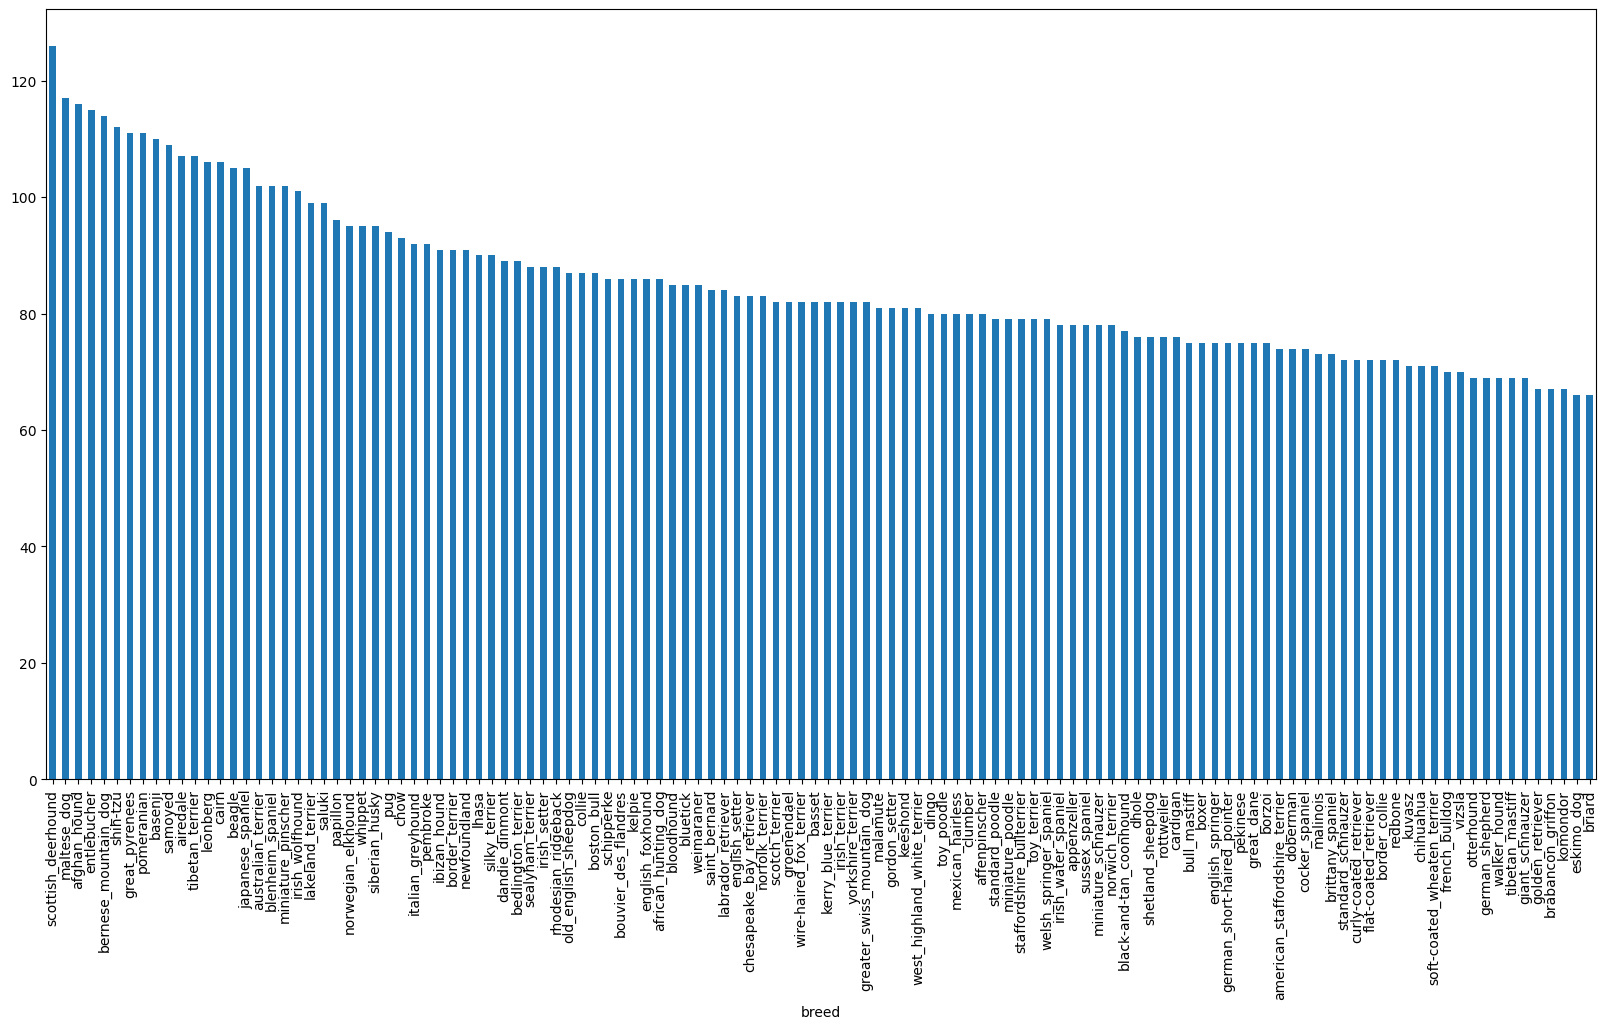

In [3]:
# How many images are there for each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [4]:
labels_csv['breed'].value_counts().median()

82.0

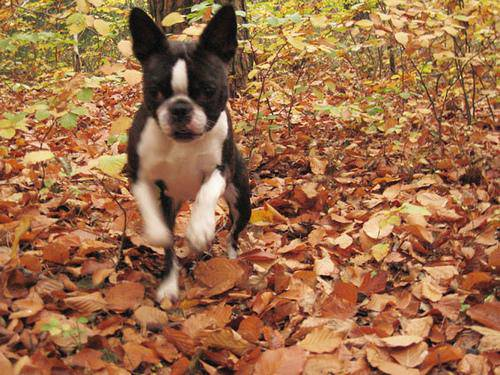

In [5]:
# Let's view an image
from IPython.display import Image
Image('/content/drive/MyDrive/Dataset/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
# Create pathnames from image ID's /content/drive/MyDrive/Dataset/labels.csv /content/drive/MyDrive/Dataset/train
filenames = ['/content/drive/MyDrive/Dataset/train/' + fname + '.jpg' for fname in labels_csv['id']]
filenames[:10]

['/content/drive/MyDrive/Dataset/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dataset/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dataset/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dataset/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dataset/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dataset/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dataset/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dataset/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dataset/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dataset/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir('/content/drive/MyDrive/Dataset/train/')) == len(filenames):
  print('Filenames match actual amount of files!!! Proceed.')
else:
  print('Filenames do not match actual amount of files, check the target directory.')

Filenames do not match actual amount of files, check the target directory.


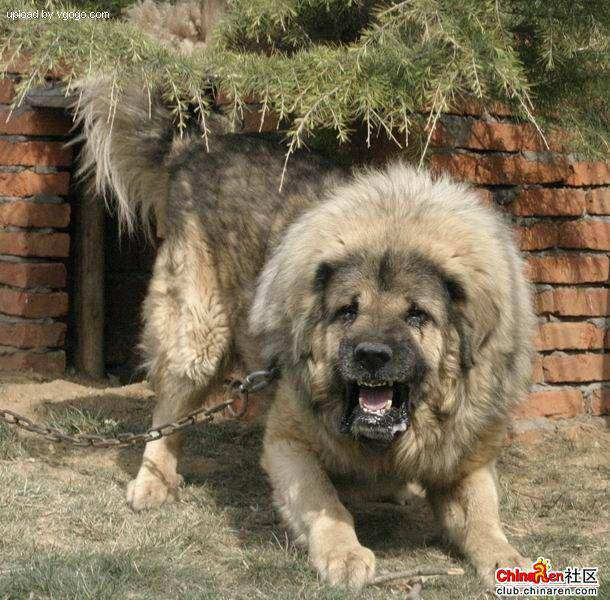

In [10]:
# One more check
Image(filenames[9000])

In [11]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [12]:
import numpy as np

labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels) # does same thing as above
labels, len(labels)

(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 10222)

In [13]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print('Number of labels matches number of filenames!')
else:
  print('Number of labels does not match number of filenames, check data directory!')

Number of labels matches number of filenames!


In [14]:
# Find the unique lable values
unique_breeds = np.unique(labels)
len(unique_breeds), unique_breeds

(120,
 array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter'

In [15]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2], len(boolean_labels)

([array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False]),
  array([False, False, False, Fa

In [17]:
# Example: Turning boolean array into integers
print(labels[0]) # original array
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [18]:
filenames[:10]

['/content/drive/MyDrive/Dataset/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dataset/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dataset/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dataset/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dataset/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dataset/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dataset/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dataset/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dataset/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dataset/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [19]:
# Setup X and y variables
X = filenames
y = boolean_labels

In [20]:
len(filenames)

10222

In [21]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, step:1000}

In [22]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [23]:
# Let's have a geez at the training data
X_train[:2], y_train[:2]

(['/content/drive/MyDrive/Dataset/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Dataset/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False

In [24]:
# eg. Convert an image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [25]:
image.max(), image.min()

(255, 0)

In [26]:
# turn image into tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [27]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  '''
  Takes an image file path and turn the image into a Tensor
  '''
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical Tensor with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32) # this is called Normalization
  # Resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [28]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  '''
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label)
  '''
  image = process_image(image_path)
  return image, label

In [29]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [30]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Create batches of data out of image (X) and label (y) pairs
  Shuffles the data if it's training data but doesn't shuffle it it's a validation data.
  Also accepts test data as input (no labels).
  '''
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print('Create test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data a valid dataset, we don't need to shuffle it
  elif valid_data:
    print('Creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print('Creating training data batches...')
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turn the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

    return data_batch

In [31]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [32]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [33]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  '''
  Display a plot of 25 images and their labels from a data batch.
  '''
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    #plt.axis('off')

In [34]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [35]:
# Unbatching for visualization
train_images, train_labels = next(train_data.as_numpy_iterator())

In [36]:
len(train_images), train_images, train_labels

(32,
 array([[[[5.61869979e-01, 5.85399389e-01, 5.77556252e-01],
          [6.02738500e-01, 6.26267910e-01, 6.18424773e-01],
          [3.81035298e-01, 3.96721572e-01, 3.93430263e-01],
          ...,
          [4.77503873e-02, 4.77503873e-02, 4.77503873e-02],
          [7.45098069e-02, 7.45098069e-02, 7.45098069e-02],
          [7.45098069e-02, 7.45098069e-02, 7.45098069e-02]],
 
         [[5.59741974e-01, 5.83271384e-01, 5.75428247e-01],
          [5.72035670e-01, 5.91643512e-01, 5.75957239e-01],
          [4.15309697e-01, 4.23783094e-01, 4.20491785e-01],
          ...,
          [6.18908294e-02, 6.18908294e-02, 6.18908294e-02],
          [7.45098069e-02, 7.45098069e-02, 7.45098069e-02],
          [7.45098069e-02, 7.45098069e-02, 7.45098069e-02]],
 
         [[5.81957877e-01, 6.05487287e-01, 5.92269540e-01],
          [5.13467968e-01, 5.33075809e-01, 5.17389536e-01],
          [4.44295377e-01, 4.52120930e-01, 4.49045569e-01],
          ...,
          [7.26453513e-02, 7.26453513e-02, 7

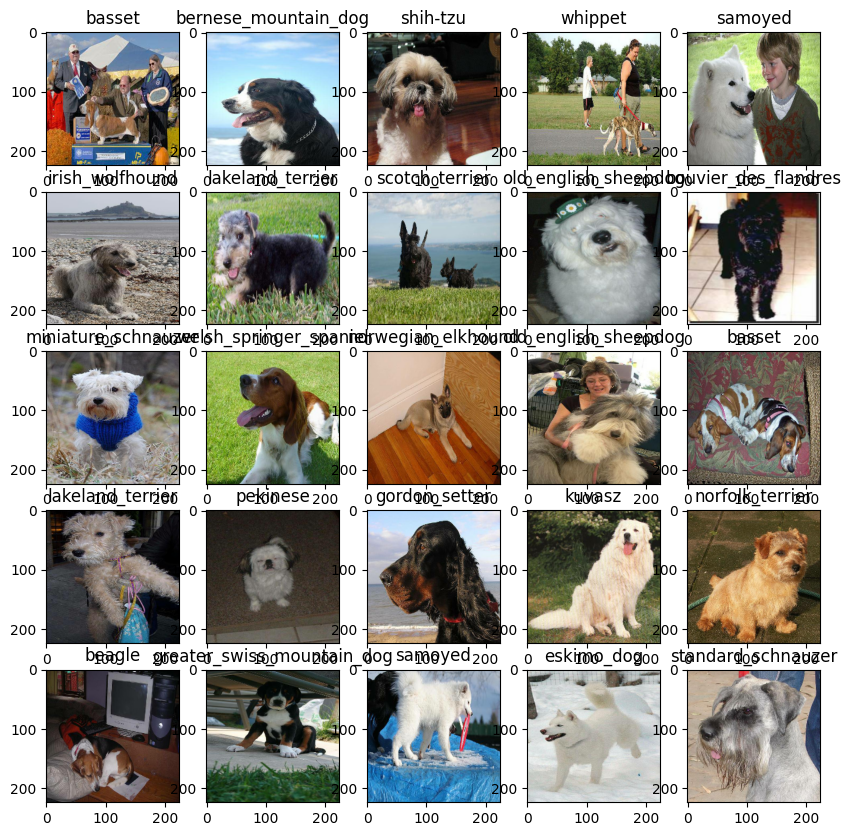

In [37]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

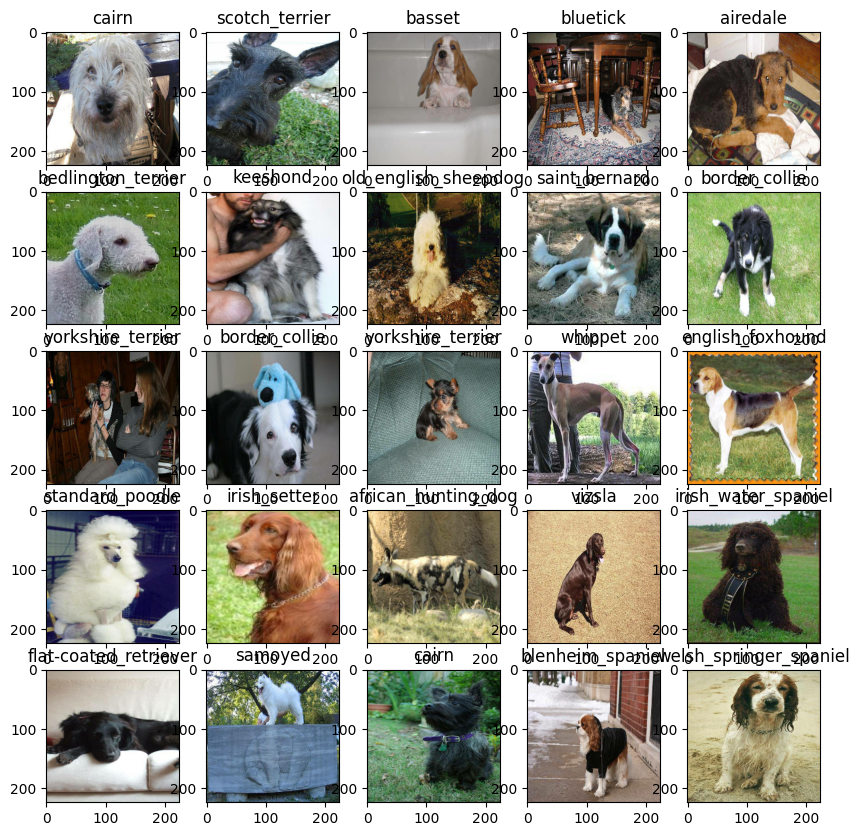

In [38]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [39]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colorchannels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow hub
MODEL_URL = ' https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1'

In [40]:
# Create a functino which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print('Building model with: ', model_url)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=output_shape, activation='softmax') # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(input_shape)

  return model

In [41]:
model = create_model()
model.summary()

Building model with:   https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1


OSError:  https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1 does not exist.

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing Tensorboard logs
  logdir = os.path.join('drive/MyDrive/dog-vision/logs',
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

In [ ]:
NUM_EPOCHS = 100 #@param {type: 'slider', min:10, max:100}

In [ ]:
# Check to make sure we're still running on a GPU
print('GPU', 'available (Yesssss!!!)' if tf.config.list_physical_devices('GPU') else 'not available :(')

In [ ]:
# Build a function to train and return a trained model
def train_model():
  '''
  Trains a given model and returns the trained version.
  '''
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

In [ ]:
%tensorboard --logdir drive/MyDrive/dog-vision/logs

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

In [ ]:
predictions.shape

In [ ]:
np.sum(predictions[0])

In [ ]:
np.sum(predictions[1])

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f'Max value (probability of prediction): {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Predicted lable: {unique_breeds[np.argmax(predictions[index])]}')

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  '''
  Turns an array of prediction probabilites into a label.
  '''
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[94])
pred_label

In [ ]:
val_data

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  '''
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  '''
  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  '''
  View the prediction, ground truth and image for sample n
  '''
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is write or wrong.
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title('{} {:2.0f}% {}'.format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                            color=color)

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images, n=77)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  '''
  Plot the top 10 highest prediction confidences along with the truth label for sample n.
  '''
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indices
  top_10_pred_indices = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indices]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indices]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=94)

In [ ]:
# Lets check out a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  '''
  Saves a given model in models directory and appends a suffix (string).
  '''
  # Create a model directory pathname with current time
  modeldir = os.path.join('drive/MyDrive/dog-vision/models',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path = modeldir + '-' + suffix + '.h5' # h5 -> save format of model
  print(f'Saving model to: {model_path}...')
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  '''
  Loads a saved model from a specified path.
  '''
  print(f'Loading savel model from: {model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={'KerasLayer': hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix='1000-images-mobilenetv2-Adam')

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model('/root/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/130-224-classification/2')


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

In [ ]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

In [ ]:
len(X), len(y)

In [ ]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

In [ ]:
full_data

In [ ]:
# Create a model for full model
full_model = create_model()

In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we cant't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data, epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
# Save the full_model
save_model(full_model, suffix='full-image-set-mobilenetv2-Adam')

In [ ]:
# Load in the full_model
loaded_full_model = load_model('/content/sample_data/models/20231125-19121700939560-full-image-set-mobilenetv2-Adam.h5')

In [ ]:
# Unipping test images drive
#!unzip '/content/drive/MyDrive/test-dog-vision.zip' -d 'drive/MyDrive/dog-vision/'

In [ ]:
# Load test image filenames
test_path = 'drive/MyDrive/dog-vision/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
# Create test data batches
test_data = create_data_batches(test_filenames, test_data=True)

In [ ]:
test_data

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

In [ ]:
# Save predictions (Numpy array) to csv file (for access later)
np.savetxt('drive/MyDrive/dog-vision/preds_array.csv', test_predictions, delimiter=',')

In [ ]:
# Load predictions (Numpy array) from csv file
test_predictions = np.loadtxt('drive/MyDrive/dog-vision/preds_array.csv', delimiter=',')

In [ ]:
test_predictions[:10]

In [ ]:
test_predictions.shape

In [ ]:
# id + List unique breeds
columns = ['id'] + list(unique_breeds)

In [ ]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=columns)
preds_df.head()

In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids[:5]

In [ ]:
# Adding all test_ids to preds DataFrame
preds_df['id'] = test_ids

In [ ]:
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
# Save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv('drive/MyDrive/dog-vision/full_model_predictions_submission_1_mobilenetV2.csv',
                index=False)

In [ ]:
# Get custom image filepaths
custom_path = 'drive/MyDrive/dog-vision/my-dog-photos/'
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get custom images (out unbatchify() function won't work since there aren't labels... may we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1,3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)